<a href="https://colab.research.google.com/github/Anushree-15-lab/ML-LAB/blob/main/5LINEAR_REGRESSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = (14, 7)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False


In [ ]:
class SimpleLinearRegression:
    '''
    A class which implements simple linear regression model.
    '''
    def __init__(self):
        self.b0 = None
        self.b1 = None
    
    def fit(self, X, y):
        '''
        Used to calculate slope and intercept coefficients.
        
        :param X: array, single feature
        :param y: array, true values
        :return: None
        '''
        numerator = np.sum((X - np.mean(X)) * (y - np.mean(y)))
        denominator = np.sum((X - np.mean(X)) ** 2)
        self.b1 = numerator / denominator
        self.b0 = np.mean(y) - self.b1 * np.mean(X)
        
    def predict(self, X):
        '''
        Makes predictions using the simple line equation.
        
        :param X: array, single feature
        :return: None
        '''
        if not self.b0 or not self.b1:
            raise Exception('Please call `SimpleLinearRegression.fit(X, y)` before making predictions.')
        return self.b0 + self.b1 * X
     

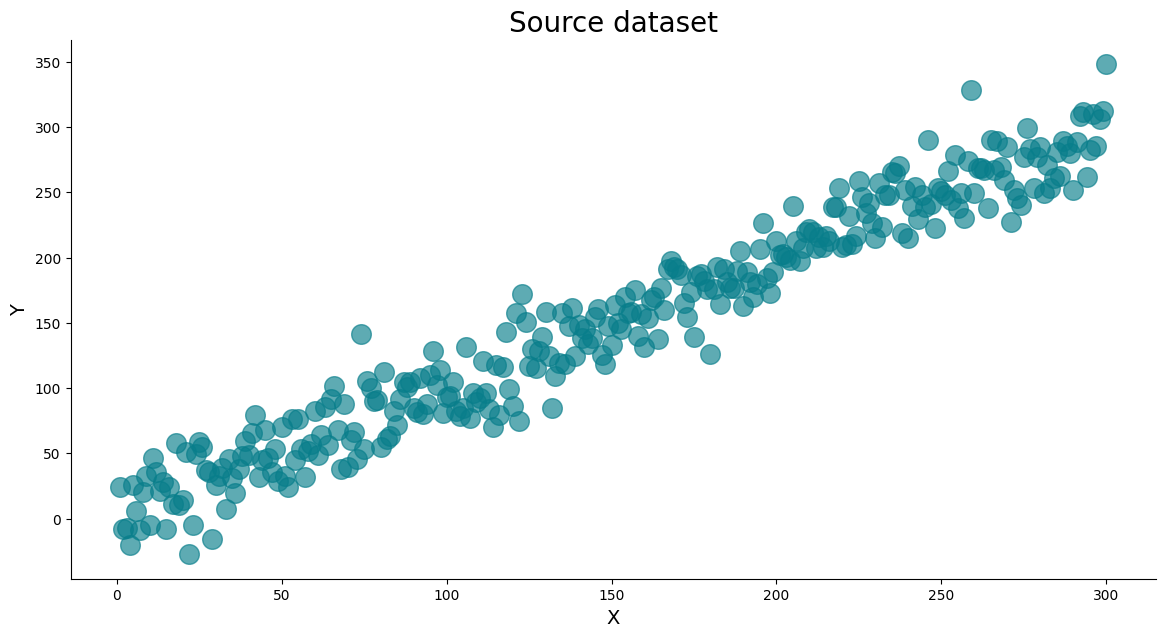

In [ ]:
X = np.arange(start=1, stop=301)
y = np.random.normal(loc=X, scale=20)

plt.scatter(X, y, s=200, c='#087E8B', alpha=0.65)
plt.title('Source dataset', size=20)
plt.xlabel('X', size=14)
plt.ylabel('Y', size=14)
plt.show()

In [ ]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

model = SimpleLinearRegression()
model.fit(X_train, y_train)
preds = model.predict(X_test)

In [ ]:
model.b0, model.b1

(0.5729348323893646, 0.9972434119624771)

In [ ]:

preds


array([204.01059087, 266.83692583, 153.15117686,  10.54536895,
       233.92789323, 226.94718935, 197.02988699, 110.26971015,
         6.5563953 , 176.08777534, 237.91686688,  58.41305273,
       218.96924205,  46.44613178, 183.06847922, 221.96097229,
       289.7735243 , 211.98853817, 149.16220321, 166.11534122,
        79.35516438, 114.2586838 , 249.88378782, 250.88103123,
       105.28349309,  43.45440155, 281.79557701, 295.75698477,
       158.13739392, 238.91411029,  18.52331625, 165.11809781,
        34.47921084,  25.50402013, 215.97751182, 120.24214427,
         8.55088213,  91.32208532,  47.44337519,  74.36894732,
        94.31381556,  77.36067755, 286.78179407,  61.40478296,
        78.35792097,  64.3965132 , 234.92513664, 229.93891958,
       112.26419697, 231.93340641, 181.0739924 , 145.17322957,
       239.9113537 ,  76.36343414, 297.7514716 , 278.80384677,
        98.3027892 ,  93.31657214, 193.04091334,  26.50126354])

In [ ]:

y_test

array([198.54051067, 289.16806858, 145.54614069,  -4.76012297,
       247.90972434, 234.15348615, 184.70325661,  92.33238121,
         5.70715153, 185.93751572, 218.65293952,  51.52000931,
       253.56284503,  46.66576639, 164.24930003, 231.94508482,
       251.6040457 , 207.56995722, 147.82139721, 159.73639511,
        91.05872346,  69.92405884, 251.21957961, 248.28040408,
        85.13352907,  32.09104608, 270.99455912, 310.13635516,
       139.57696544, 252.19803431,  58.08102896, 176.40086323,
        45.45889094,  58.69869226, 212.68127232,  86.1452507 ,
        20.20495669,  82.04038252,  35.61954483, 141.14307022,
        87.53551505, 100.08364124, 289.15447747,  48.83462008,
        90.39792724,  56.42919733, 265.53202817, 214.95157309,
        96.34252399, 223.66384168, 175.87172924, 154.42683274,
       214.88451631, 105.70841396, 306.21003856, 277.43359209,
       113.49609096,  80.47248636, 169.68722238,  55.18553915])

In [ ]:

from sklearn.metrics import mean_squared_error

rmse = lambda y, y_pred: np.sqrt(mean_squared_error(y, y_pred))
rmse(y_test, preds)

19.783029293893275

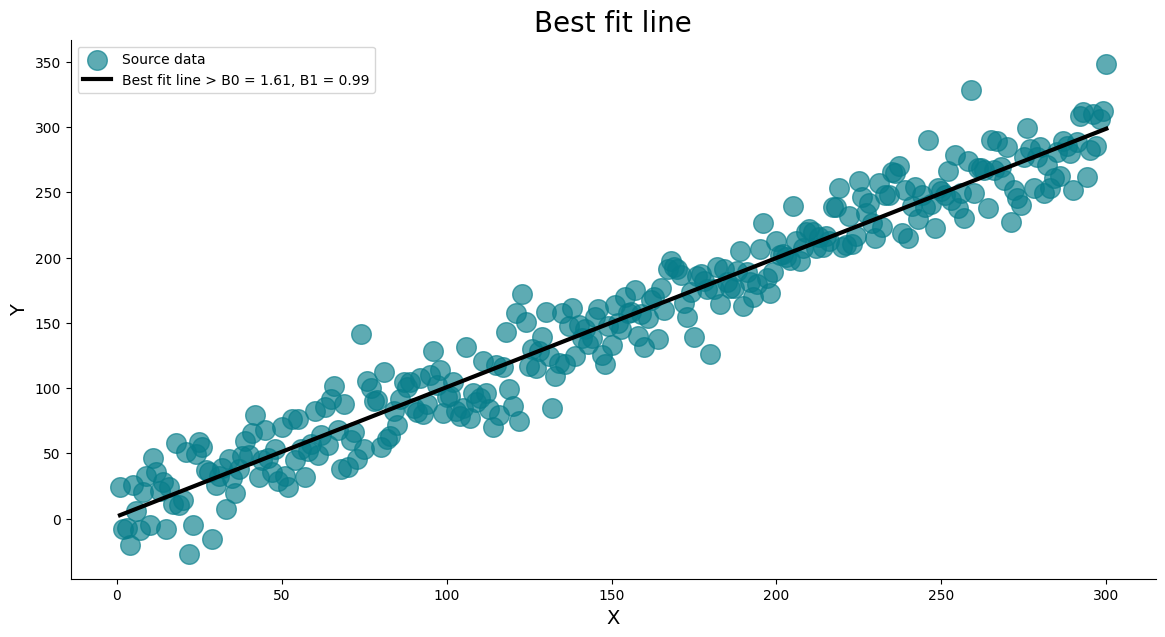

In [ ]:
model_all = SimpleLinearRegression()
model_all.fit(X, y)
preds_all = model_all.predict(X)

plt.scatter(X, y, s=200, c='#087E8B', alpha=0.65, label='Source data')
plt.plot(X, preds_all, color='#000000', lw=3, label=f'Best fit line > B0 = {model_all.b0:.2f}, B1 = {model_all.b1:.2f}')
plt.title('Best fit line', size=20)
plt.xlabel('X', size=14)
plt.ylabel('Y', size=14)
plt.legend()
plt.show()

In [ ]:

from sklearn.linear_model import LinearRegression

sk_model = LinearRegression()
sk_model.fit(np.array(X_train).reshape(-1, 1), y_train)
sk_preds = sk_model.predict(np.array(X_test).reshape(-1, 1))

sk_model.intercept_, sk_model.coef_
     

(0.5729348323893646, array([0.99724341]))

In [ ]:

rmse(y_test, sk_preds)

19.783029293893275